In [3]:
#%matplotlib notebook
import os, time, sys
import tables as tb
import matplotlib.pyplot as plt
import numpy as np
import panda2.analysis.interpreter as interpreter
import panda2.analysis.event_builder as event_builder
import panda2.analysis.fitfunctions as fitfunc

datdir = '/home/thirono/Documents/data/2023-05-31/panda2_iv'
#!mkdir -p /home/thirono/Documents/data/2023-05-31/panda2_iv

In [42]:
tmpdir = '/home/thirono/Nextcloud-kit/workspace/panda2-daq/scratch/output/iv/'
for fname in np.sort(os.listdir(tmpdir)):
    if fname[-3:]!='.h5':
        continue
    with tb.open_file(os.path.join(tmpdir, fname)) as f:
        dat = f.root.iv[:]
        print(fname, len(dat), end = ' ')
        if len(dat)!=0:
            print(np.min(dat['volt']), np.max(dat['volt']))
        else:
            print()

20230530_154640_iv.h5 131 -127.5832 -1e-04
20230530_160155_iv.h5 1560 -152.7839 0.0
20230530_165514_iv.h5 1040 -199.0 0.0
20230531_103928_iv.h5 1040 -199.0 3.9e-06
20230531_111328_iv.h5 4010 -199.0 0.0


0 20230530_154640_iv.h5 131 -127.5832 -1e-04
1 20230530_160155_iv.h5 1560 -152.7839 0.0
2 20230530_165514_iv.h5 1040 -199.0 0.0
3 20230531_103928_iv.h5 1040 -199.0 3.9e-06
4 20230531_111328_iv.h5 4010 -199.0 0.0


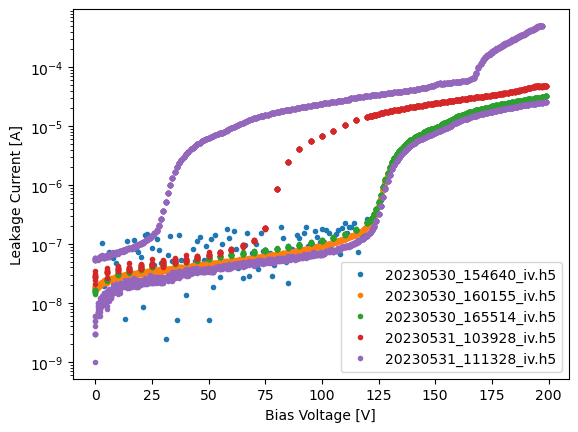

In [45]:
for i, fname in enumerate(np.sort(os.listdir(tmpdir))):
    if fname[-3:]!='.h5':
        continue
    with tb.open_file(os.path.join(tmpdir, fname)) as f:
        dat = f.root.iv[:]
        print(i, fname, len(dat), end = ' ')
        if len(dat)!=0:
            print(np.min(dat['volt']), np.max(dat['volt']))
        else:
            print()

        x = dat['curr'][dat['curr']<0]
        y = dat['volt'][dat['curr']<0]
        plt.plot(-y,-x, '.', label=fname)
        plt.yscale('log')
        plt.xlabel('Bias Voltage [V]')
        plt.ylabel('Leakage Current [A]')
plt.legend()

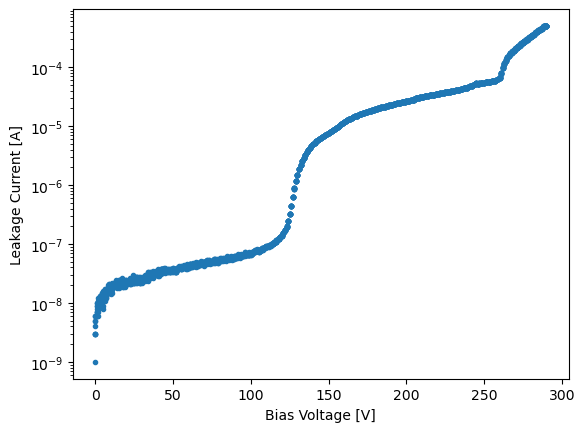

In [76]:
for i, fname in enumerate(['20230531_111328_iv.h5']):
    with tb.open_file(os.path.join(tmpdir,fname)) as f:
        dat = f.root.iv[:]
    arg = np.argwhere(dat['volt'][1:]-dat['volt'][:-1] > 0)[0,0] +1
    y = dat['curr'][:arg][dat['curr'][:arg]<0]
    x = dat['volt'][:arg][dat['curr'][:arg]<0]
    y2 = dat['curr'][arg:][dat['curr'][arg:]<0]
    x2 = dat['volt'][arg:][dat['curr'][arg:]<0]
    x = x - 93
    plt.plot(-x[x<-180],-y[x<-180], 'C0.', label=fname)
    plt.plot(-x2[x2>=-180],-y2[x2>=-180], 'C0.', label=fname)
    plt.yscale('log')
    plt.xlabel('Bias Voltage [V]')
    plt.ylabel('Leakage Current [A]')
#plt.legend()